### Reducing data size
In order to see the effects of overfitting more clearly, we reduce the size of the data by a factor of 10

In [ ]:
Data1=Data.sample(False,0.1).cache()
(trainingData,testData)=Data1.randomSplit([0.7,0.3])

print 'Sizes: Data1=%d, trainingData=%d, testData=%d'%(Data1.count(),trainingData.cache().count(),testData.cache().count())

In [ ]:
counts=testData.map(lambda lp:(lp.label,1)).reduceByKey(lambda x,y:x+y).collect()
counts.sort(key=lambda x:x[1],reverse=True)
counts

### Random Forests

* Following [this example](http://spark.apache.org/docs/latest/mllib-ensembles.html#classification) from the mllib documentation

* [pyspark.mllib.trees.RandomForest documentation](http://spark.apache.org/docs/latest/api/python/pyspark.mllib.html#pyspark.mllib.tree.RandomForest)

**trainClassifier**`(data, numClasses, categoricalFeaturesInfo, numTrees, featureSubsetStrategy='auto', impurity='gini', maxDepth=4, maxBins=32, seed=None)`   
Method to train a decision tree model for binary or multiclass classification.

**Parameters:**  
* *data* – Training dataset: RDD of LabeledPoint. Labels should take values {0, 1, ..., numClasses-1}.  
* *numClasses* – number of classes for classification.  
* *categoricalFeaturesInfo* – Map storing arity of categorical features. E.g., an entry (n -> k) indicates that feature n is categorical with k categories indexed from 0: {0, 1, ..., k-1}.  
* *numTrees* – Number of trees in the random forest.  
* *featureSubsetStrategy* – Number of features to consider for splits at each node. Supported: “auto” (default), “all”, “sqrt”, “log2”, “onethird”. If “auto” is set, this parameter is set based on numTrees: if numTrees == 1, set to “all”; if numTrees > 1 (forest) set to “sqrt”.
* *impurity* – Criterion used for information gain calculation. Supported values: “gini” (recommended) or “entropy”.  
* *maxDepth* – Maximum depth of the tree. E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. (default: 4)  
* *maxBins* – maximum number of bins used for splitting features (default: 32)
* *seed* – Random seed for bootstrapping and choosing feature subsets.  

**Returns:**	
RandomForestModel that can be used for prediction

In [ ]:
from time import time
errors={}
for depth in [1,3,6,10,15,20]:
    start=time()
    model = RandomForest.trainClassifier(## FILLIN ##)
    #print model.toDebugString()
    errors[depth]={}
    dataSets={'train':trainingData,'test':testData}
    for name in dataSets.keys():  # Calculate errors on train and test sets
        ### FILLIN ###
    print depth,errors[depth],int(time()-start),'seconds'
print errors

In [2]:
#Change this variable to point to the location of the github repository on your computer
Root_dir="/Users/yoavfreund/BigData/UCSD_BigData_2016/"

In [4]:
import pickle
%cd $Root_dir/Data/covtype
Results=pickle.load(open('RandomForestsResults.pkl','r'))

/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/BigData_spring2016/UCSD_BigData_2016/Data/covtype


In [5]:
%pylab inline
%cd $Root_dir/Notebooks/Ensembles
from plot_utils import *

Populating the interactive namespace from numpy and matplotlib
/Users/yoavfreund/academic.papers/Courses/BigDataAnalytics/BigData_spring2016/UCSD_BigData_2016/Notebooks/Ensembles


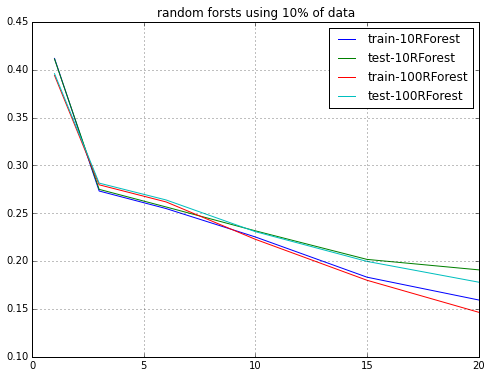

In [6]:
make_figure([Results['RF10p_10'],Results['RF10p_100']],['10RForest','100RForest'],Title='random forsts using 10% of data')

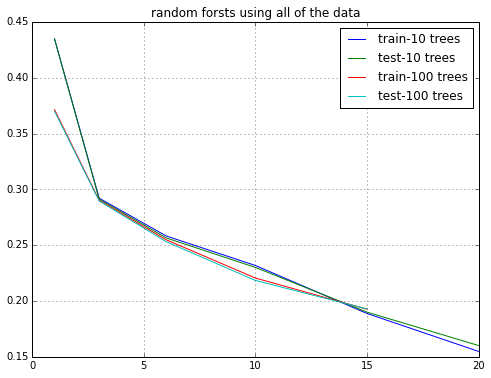

In [7]:
make_figure([Results['RFall_10'],Results['RFall_100']],['10 trees','100 trees'],Title='random forsts using all of the data')